In [12]:
%load_ext autoreload
%autoreload 2
from typing import Dict
import pickle
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
# paths
el2n_grand_path = Path('/system/user/beck/pwbeck/projects/regularization/tflearning/outputs/cifar10-30-cf10-el2n.1-resnet18--230322_095821/el2n_grand_scores_230323_091752.p')
pd_entropy_path = Path('/system/user/beck/pwbeck/projects/regularization/tflearning/outputs_scripts/prediction_depth/PD-cifar10-resnet20-knnsamples1000-knnneighs30-seed1--230323_140338/prediction_depth_results.p')

In [4]:
def load_dict(path):
    with open(path, 'rb') as f:
        return pickle.load(f)

In [5]:
el2n_grand = load_dict(el2n_grand_path)
pd_entropy = load_dict(pd_entropy_path)

In [5]:
# TODO
# scatter plots el2n vs pd entropy, el2n vs grand, pd entropy vs grand
# correlation coefficient
# histogram of el2n, pd entropy, grand per class

In [31]:
from typing import Tuple


def get_class_sorted_entropies(entropies: np.ndarray, class_idxes: np.ndarray) -> Tuple[Dict[int, pd.Series], pd.DataFrame]:
    """Get entropies split by class idxes.
    """
    assert len(entropies) == len(
        class_idxes
    ), f'entropies and class_labels must have same length, but are {len(entropies)} and {len(class_idxes)}'
    cf_labels_entropy = np.stack([entropies, class_idxes], axis=1)
    entr_labels_df = pd.DataFrame(cf_labels_entropy, columns=['entropy', 'label'])
    entropies_per_label_df = entr_labels_df.pivot(columns='label', values='entropy')
    class_sorted_entropy_arrays = {}
    for c in entropies_per_label_df.columns:
        class_idx = int(c)
        class_sorted_entropy_arrays[class_idx] = entropies_per_label_df[~entropies_per_label_df[c].isnull()][c]
    return class_sorted_entropy_arrays, entropies_per_label_df

In [6]:
def plot_entropy_hist(entropies, title, figsize=(6, 4)):
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    ax.set_title(title)
    if isinstance(entropies, dict):
        for key, entr in entropies.items():
            ax.hist(entr, bins=50, label=key, alpha=0.2)
    else:
        ax.hist(entropies, bins=50)
    ax.set_xlabel('Entropy')
    ax.set_ylabel('Count')
    ax.grid(True)
    ax.legend()
    return fig

In [20]:
el2n_grand['el2n']['average']
pd_entropy['average_train']

array([1.14381957, 1.2138265 , 0.99767308, ..., 0.65664217, 0.87208436,
       1.32656455])

In [38]:
def plot_scatter(x, y, title, figsize=(6, 4), x_label='x', y_label='y'):
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    ax.set_title(title)
    ax.scatter(x, y, alpha=0.2, s=1)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.grid(True)
    rank_correlation, pval = scipy.stats.spearmanr(x, y)
    print(f'Rank correlation: {rank_correlation:.3f} (pval: {pval:.6f})')
    return fig

Rank correlation: -0.049 (pval: 0.000000)


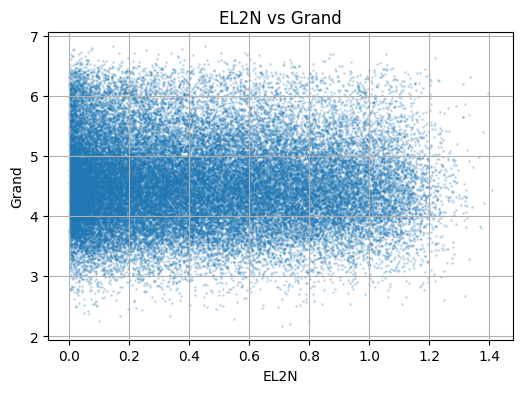

In [39]:
f = plot_scatter(el2n_grand['el2n']['average'], el2n_grand['grand']['average'], 'EL2N vs Grand', figsize=(6, 4), x_label='EL2N', y_label='Grand')

Rank correlation: 0.200 (pval: 0.000000)


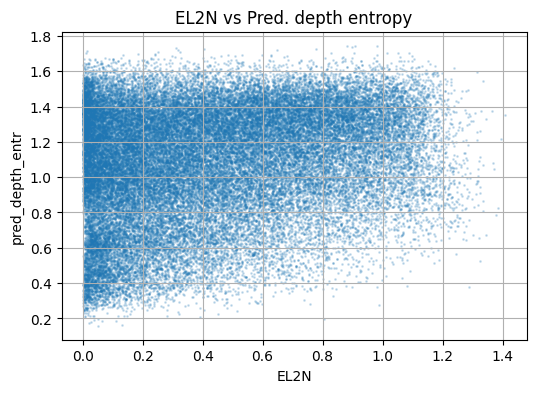

In [40]:
f = plot_scatter(el2n_grand['el2n']['average'], pd_entropy['average_train'], 'EL2N vs Pred. depth entropy', figsize=(6, 4), x_label='EL2N', y_label='pred_depth_entr')

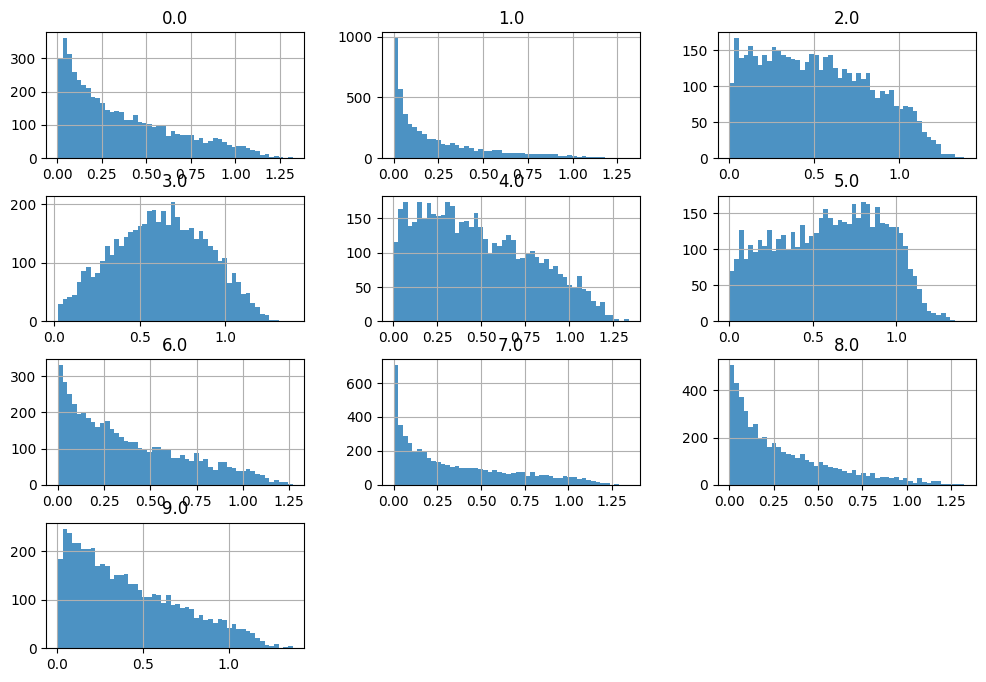

In [35]:
# EL2N
_, el2n_class_df = get_class_sorted_entropies(el2n_grand['el2n']['average'], el2n_grand['labels'])
f = el2n_class_df.hist(figsize=(12, 8), bins=50, alpha=0.8)

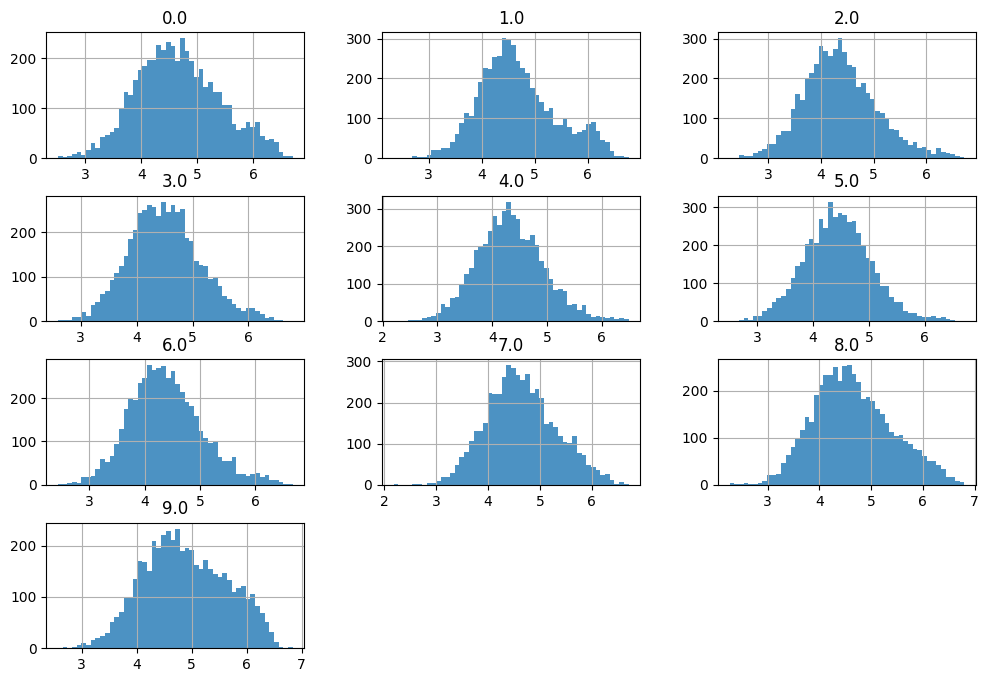

In [36]:
# GraNd
_, el2n_class_df = get_class_sorted_entropies(el2n_grand['grand']['average'], el2n_grand['labels'])
f = el2n_class_df.hist(figsize=(12, 8), bins=50, alpha=0.8)

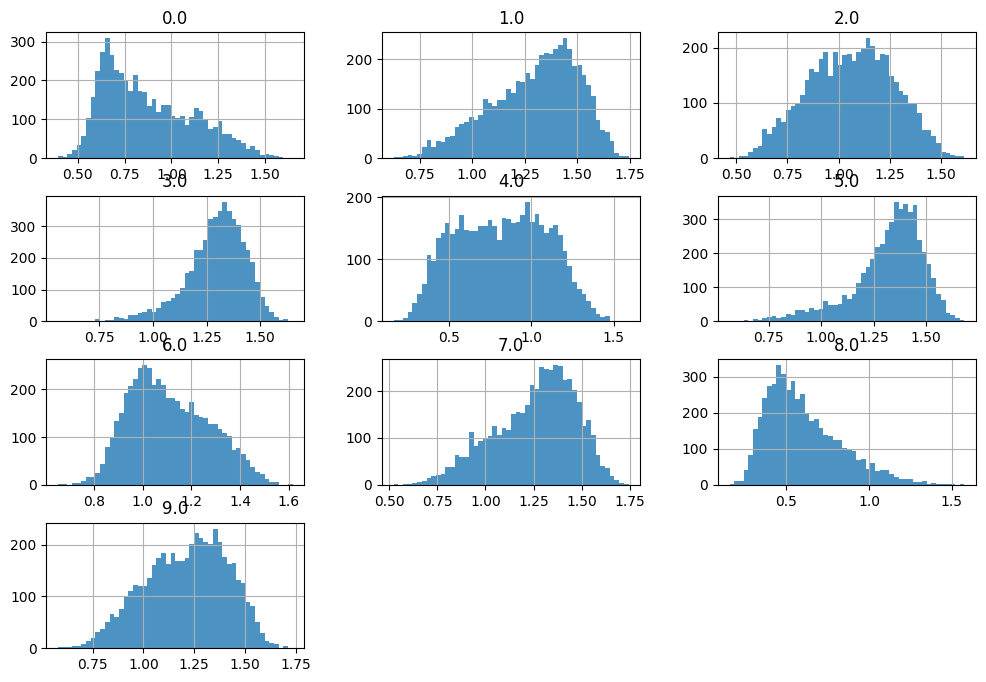

In [37]:
# pred_depth_entr
_, el2n_class_df = get_class_sorted_entropies(pd_entropy['average_train'], pd_entropy['single_runs'][0]['train']['labels'])
f = el2n_class_df.hist(figsize=(12, 8), bins=50, alpha=0.8)